In [637]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, classification_report, RocCurveDisplay, f1_score
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from imblearn.over_sampling import SMOTE
import math as m
import scipy.stats as stats


In [504]:
df = pd.read_excel('DataForTable2.1.xltx')
df

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,Zimbabwe,2022,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [505]:
df.year
df.columns

Index(['Country name', 'year', 'Life Ladder', 'Log GDP per capita',
       'Social support', 'Healthy life expectancy at birth',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Positive affect', 'Negative affect'],
      dtype='object')

In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


## impute missing values by interpolating

In [507]:
df['year'] = pd.to_datetime(df['year'], format='%Y')

df.set_index('year', inplace=True)


In [508]:
df

,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,,
2008-01-01,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
2009-01-01,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2010-01-01,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
2011-01-01,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
2012-01-01,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...
2019-01-01,Zimbabwe,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2020-01-01,Zimbabwe,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2021-01-01,Zimbabwe,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682


In [509]:
for var in ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
            'Positive affect', 'Negative affect']:
    df[var] = df.groupby('Country name')[var].transform(lambda group: group.interpolate(method='time', limit_direction='both'))


In [510]:
df.info() #there're still missing values

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2363 entries, 2008-01-01 to 2023-01-01
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   Life Ladder                       2363 non-null   float64
 2   Log GDP per capita                2354 non-null   float64
 3   Social support                    2362 non-null   float64
 4   Healthy life expectancy at birth  2313 non-null   float64
 5   Freedom to make life choices      2363 non-null   float64
 6   Generosity                        2354 non-null   float64
 7   Perceptions of corruption         2333 non-null   float64
 8   Positive affect                   2361 non-null   float64
 9   Negative affect                   2362 non-null   float64
dtypes: float64(9), object(1)
memory usage: 203.1+ KB


In [511]:
df.reset_index(inplace=True)
df

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008-01-01,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009-01-01,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010-01-01,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011-01-01,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012-01-01,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2358,2019-01-01,Zimbabwe,2.693523,7.697755,0.759162,53.099998,0.631908,-0.050874,0.830652,0.658434,0.235354
2359,2020-01-01,Zimbabwe,3.159802,7.596050,0.717243,53.575001,0.643303,0.002848,0.788523,0.660658,0.345736
2360,2021-01-01,Zimbabwe,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,2022-01-01,Zimbabwe,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [512]:
df.duplicated().sum()

0

In [513]:
df_3yr = df[df['year'].isin(['2021-01-01', '2022-01-01', '2023-01-01'])]
df_3yr

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,2021-01-01,Afghanistan,2.436034,7.324501,0.454175,54.549999,0.394306,-0.084656,0.946299,0.178886,0.606713
13,2022-01-01,Afghanistan,1.281271,7.324501,0.228217,54.875000,0.368377,-0.084656,0.733198,0.205868,0.575512
14,2023-01-01,Afghanistan,1.445909,7.324501,0.368478,55.200001,0.228301,-0.084656,0.738471,0.260513,0.460167
28,2021-01-01,Albania,5.255482,9.588499,0.701883,69.150002,0.827453,0.038603,0.896127,0.553830,0.253654
29,2022-01-01,Albania,5.212213,9.648703,0.724090,69.175003,0.802250,-0.069952,0.845502,0.547126,0.254826
...,...,...,...,...,...,...,...,...,...,...,...
2343,2022-01-01,Zambia,3.728098,8.101115,0.717196,55.674999,0.888741,-0.008760,0.716396,0.659846,0.308741
2344,2023-01-01,Zambia,3.685568,8.115053,0.664099,56.099998,0.854004,0.092377,0.814191,0.652999,0.359132
2360,2021-01-01,Zimbabwe,3.154578,7.656878,0.685151,54.049999,0.667636,-0.079007,0.756945,0.609917,0.241682
2361,2022-01-01,Zimbabwe,3.296220,7.670073,0.666172,54.525002,0.651987,-0.072935,0.752632,0.640609,0.191350


In [514]:
df23 = df[df['year'] == '2023-01-01']
df23

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
14,2023-01-01,Afghanistan,1.445909,7.324501,0.368478,55.200001,0.228301,-0.084656,0.738471,0.260513,0.460167
30,2023-01-01,Albania,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,2023-01-01,Argentina,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,2023-01-01,Armenia,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,2023-01-01,Australia,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163
...,...,...,...,...,...,...,...,...,...,...,...
2295,2023-01-01,Venezuela,5.765363,5.526723,0.884668,63.700001,0.756530,0.123792,0.825393,0.757685,0.300038
2313,2023-01-01,Vietnam,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510
2327,2023-01-01,Yemen,3.531574,7.447973,0.824958,56.599998,0.582724,-0.106460,0.771464,0.446534,0.340794
2344,2023-01-01,Zambia,3.685568,8.115053,0.664099,56.099998,0.854004,0.092377,0.814191,0.652999,0.359132


In [515]:
df22 = df[df['year'] == '2022-01-01']
df22

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
13,2022-01-01,Afghanistan,1.281271,7.324501,0.228217,54.875000,0.368377,-0.084656,0.733198,0.205868,0.575512
29,2022-01-01,Albania,5.212213,9.648703,0.724090,69.175003,0.802250,-0.069952,0.845502,0.547126,0.254826
41,2022-01-01,Algeria,5.538172,9.322542,0.783401,66.699997,0.439971,-0.044912,0.611083,0.583429,0.258596
62,2022-01-01,Argentina,6.260993,10.018916,0.893330,67.250000,0.825189,-0.130209,0.810037,0.724068,0.284279
79,2022-01-01,Armenia,5.381943,9.682955,0.811169,67.925003,0.789599,-0.157764,0.704730,0.530931,0.549468
...,...,...,...,...,...,...,...,...,...,...,...
2294,2022-01-01,Venezuela,5.948992,5.526723,0.899366,63.875000,0.770417,0.123792,0.798016,0.754337,0.292252
2312,2022-01-01,Vietnam,6.266509,9.341064,0.878744,65.599998,0.975405,-0.182106,0.703423,0.774236,0.108473
2326,2022-01-01,Yemen,3.590379,7.447973,0.872113,56.825001,0.606788,-0.106460,0.787555,0.459952,0.255151
2343,2022-01-01,Zambia,3.728098,8.101115,0.717196,55.674999,0.888741,-0.008760,0.716396,0.659846,0.308741


In [516]:
df21 = df[df['year'] == '2021-01-01']
df21

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
12,2021-01-01,Afghanistan,2.436034,7.324501,0.454175,54.549999,0.394306,-0.084656,0.946299,0.178886,0.606713
28,2021-01-01,Albania,5.255482,9.588499,0.701883,69.150002,0.827453,0.038603,0.896127,0.553830,0.253654
40,2021-01-01,Algeria,5.217018,9.308296,0.840710,66.599998,0.558487,-0.115957,0.711900,0.498022,0.257779
61,2021-01-01,Argentina,5.908279,9.977073,0.882305,67.199997,0.819479,-0.014380,0.816257,0.684860,0.345132
78,2021-01-01,Armenia,5.300569,9.560513,0.762044,67.650002,0.795170,-0.158733,0.705334,0.565782,0.477540
...,...,...,...,...,...,...,...,...,...,...,...
2275,2021-01-01,Uzbekistan,6.185308,8.961944,0.895504,65.300003,0.927415,0.182672,0.661562,0.698459,0.232672
2293,2021-01-01,Venezuela,5.107553,5.526723,0.812418,64.050003,0.595620,0.123792,0.823898,0.697587,0.389351
2311,2021-01-01,Vietnam,5.540250,9.271268,0.799494,65.500000,0.896800,0.104378,0.797788,0.650598,0.280437
2342,2021-01-01,Zambia,3.082155,8.082337,0.619071,55.250000,0.832574,0.138026,0.824031,0.655690,0.348551


In [517]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year                              138 non-null    datetime64[ns]
 1   Country name                      138 non-null    object        
 2   Life Ladder                       138 non-null    float64       
 3   Log GDP per capita                138 non-null    float64       
 4   Social support                    138 non-null    float64       
 5   Healthy life expectancy at birth  136 non-null    float64       
 6   Freedom to make life choices      138 non-null    float64       
 7   Generosity                        138 non-null    float64       
 8   Perceptions of corruption         137 non-null    float64       
 9   Positive affect                   138 non-null    float64       
 10  Negative affect                   138 non-null    flo

### impute missing values via KNN

In [518]:
# test the best value for n neighbor via r2 score

maximum r2score test set 0.8372290370986162 at N 1


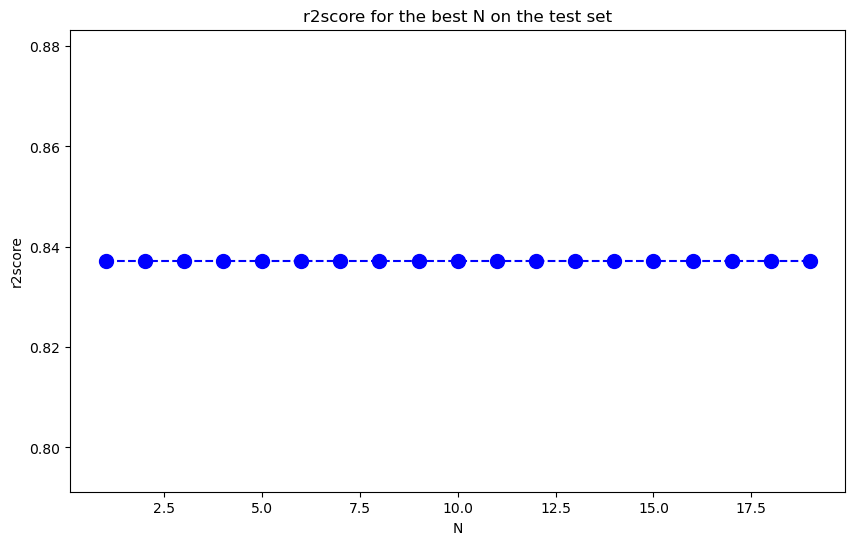

In [519]:
r2score = []

for n in range(1,20):
    
    na_col = df23_.columns[df23_.isnull().any()]
    
    na_col_indices = [df23_.columns.get_loc(col) for col in na_col]
    
    imputer = KNNImputer(n_neighbors=n, weights='distance')
    df23_imputed = imputer.fit_transform(df23_)
    df23_[na_col] = df23_imputed[:, na_col_indices]

    X = df23_.drop(columns = 'Life Ladder')
    y = df23_['Life Ladder']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train, y_train)

    y_train_pre = model.predict(X_train)
    y_test_pre = model.predict(X_test)

    r2score.append(r2_score(y_test, y_test_pre))

plt.figure(figsize=(10,6))
plt.plot(range(1,20), r2score, color = "blue", linestyle = "dashed",
         marker = "o", markerfacecolor = "blue", markersize = 10)

plt.title("r2score for the best N on the test set")

plt.xlabel("N")
plt.ylabel("r2score")

print("maximum r2score test set", max(r2score), "at N", r2score.index(max(r2score))+1)

In [531]:
# apply n_neighbor = 1

def KNNValue(data):
    
    numeric_data = data.select_dtypes(include=[np.number])
    na_col = numeric_data.columns[numeric_data.isnull().any()]
    na_col_indices = [numeric_data.columns.get_loc(col) for col in na_col]
    
    imputer = KNNImputer(n_neighbors=1, weights='distance')
    numeric_data_imputed = imputer.fit_transform(numeric_data)
    
    numeric_data[na_col] = numeric_data_imputed[:, na_col_indices]
    data[numeric_data.columns] = numeric_data
    
    return data.info()


In [533]:
KNNValue(df21)

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 12 to 2360
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year                              122 non-null    datetime64[ns]
 1   Country name                      122 non-null    object        
 2   Life Ladder                       122 non-null    float64       
 3   Log GDP per capita                122 non-null    float64       
 4   Social support                    122 non-null    float64       
 5   Healthy life expectancy at birth  122 non-null    float64       
 6   Freedom to make life choices      122 non-null    float64       
 7   Generosity                        122 non-null    float64       
 8   Perceptions of corruption         122 non-null    float64       
 9   Positive affect                   122 non-null    float64       
 10  Negative affect                   122 non-null    flo

/var/folders/6g/z7c4_v2s4x5g_4nmtry98b2c0000gn/T/ipykernel_75965/784344645.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [534]:
KNNValue(df22)

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 13 to 2361
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year                              140 non-null    datetime64[ns]
 1   Country name                      140 non-null    object        
 2   Life Ladder                       140 non-null    float64       
 3   Log GDP per capita                140 non-null    float64       
 4   Social support                    140 non-null    float64       
 5   Healthy life expectancy at birth  140 non-null    float64       
 6   Freedom to make life choices      140 non-null    float64       
 7   Generosity                        140 non-null    float64       
 8   Perceptions of corruption         140 non-null    float64       
 9   Positive affect                   140 non-null    float64       
 10  Negative affect                   140 non-null    flo

/var/folders/6g/z7c4_v2s4x5g_4nmtry98b2c0000gn/T/ipykernel_75965/784344645.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [535]:
KNNValue(df23)

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   year                              138 non-null    datetime64[ns]
 1   Country name                      138 non-null    object        
 2   Life Ladder                       138 non-null    float64       
 3   Log GDP per capita                138 non-null    float64       
 4   Social support                    138 non-null    float64       
 5   Healthy life expectancy at birth  138 non-null    float64       
 6   Freedom to make life choices      138 non-null    float64       
 7   Generosity                        138 non-null    float64       
 8   Perceptions of corruption         138 non-null    float64       
 9   Positive affect                   138 non-null    float64       
 10  Negative affect                   138 non-null    flo

/var/folders/6g/z7c4_v2s4x5g_4nmtry98b2c0000gn/T/ipykernel_75965/784344645.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [536]:
df23.describe() #low variance, distribution relatively normal

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,138,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,2023-01-01 00:00:00,5.620811,9.495747,0.790988,65.157971,0.791379,0.031157,0.714204,0.652119,0.293461
min,2023-01-01 00:00:00,1.445909,5.526723,0.368478,52.200001,0.228301,-0.268211,0.152543,0.260513,0.110535
25%,2023-01-01 00:00:00,4.679697,8.612232,0.701845,60.700001,0.734933,-0.081641,0.650091,0.580944,0.229711
50%,2023-01-01 00:00:00,5.862690,9.643922,0.829442,66.099998,0.810746,0.022123,0.765596,0.668374,0.285380
75%,2023-01-01 00:00:00,6.486904,10.524409,0.889664,69.574999,0.876399,0.132979,0.836950,0.735437,0.357242
max,2023-01-01 00:00:00,7.698929,11.675588,0.978789,74.599998,0.964832,0.589554,0.947856,0.843147,0.515916
std,NaN,1.139478,1.221816,0.129663,5.554347,0.120220,0.160009,0.177828,0.109041,0.088834


In [537]:
df22.describe() #same as above

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,140,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,2022-01-01 00:00:00,5.499095,9.471970,0.797777,64.864464,0.783176,0.026262,0.716992,0.651233,0.294738
min,2022-01-01 00:00:00,1.281271,5.526723,0.228217,46.150002,0.368377,-0.318011,0.148739,0.205868,0.095399
25%,2022-01-01 00:00:00,4.627101,8.610786,0.727484,60.431249,0.713865,-0.084937,0.655775,0.582624,0.219486
50%,2022-01-01 00:00:00,5.796375,9.580986,0.832207,65.937500,0.796425,0.004981,0.764144,0.666512,0.278906
75%,2022-01-01 00:00:00,6.363238,10.520091,0.896537,69.543751,0.875193,0.135861,0.846202,0.728089,0.361889
max,2022-01-01 00:00:00,7.728998,11.657388,0.984801,74.474998,0.975405,0.600467,0.941626,0.834880,0.575512
std,NaN,1.226958,1.216707,0.138668,5.900973,0.122011,0.161836,0.179749,0.112192,0.098187


In [538]:
df21.describe() #same

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,122,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,2021-01-01 00:00:00,5.636193,9.575856,0.803933,65.441804,0.788475,0.032249,0.721315,0.653087,0.290227
min,2021-01-01 00:00:00,2.178809,5.526723,0.435524,51.299999,0.394306,-0.289711,0.144935,0.178886,0.116078
25%,2021-01-01 00:00:00,4.922029,8.845325,0.720320,62.112499,0.719245,-0.074859,0.668410,0.591765,0.228842
50%,2021-01-01 00:00:00,5.781278,9.607069,0.848551,66.350002,0.813427,0.019689,0.767662,0.666645,0.273475
75%,2021-01-01 00:00:00,6.444900,10.575351,0.898244,69.637501,0.873806,0.130822,0.851296,0.733063,0.345021
max,2021-01-01 00:00:00,7.794378,11.587486,0.979858,74.349998,0.965093,0.540485,0.946299,0.834382,0.606713
std,NaN,1.139057,1.134098,0.127444,5.447141,0.111657,0.147308,0.189644,0.111480,0.091782


## observe ranking over 3 yr

In [539]:
df_sorted = df23.sort_values(by='Life Ladder')
df_top_bottom = pd.concat([df_sorted.head(10), df_sorted.tail(10)])

fig = px.bar(df_top_bottom, y='Life Ladder', x='Country name', text_auto='.2s',
            title="Happiness Ranking 2023")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [540]:
df_sorted = df22.sort_values(by='Life Ladder')
df_top_bottom = pd.concat([df_sorted.head(10), df_sorted.tail(10)])

fig = px.bar(df_top_bottom, y='Life Ladder', x='Country name', text_auto='.2s',
            title="Happiness Ranking 2022")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [541]:
df_sorted = df21.sort_values(by='Life Ladder')
df_top_bottom = pd.concat([df_sorted.head(10), df_sorted.tail(10)])

fig = px.bar(df_top_bottom, y='Life Ladder', x='Country name', text_auto='.2s',
            title="Happiness Ranking 2021")
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()

In [ ]:
#bottom: Afghanistan
#top: Finland
#upward: Kuwait*
#downward: Yemen, Comoros, Sri Lanka

## observe correlation

In [ ]:
# next concentrate on 2023 to analyse important contributors

/Users/giselles/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



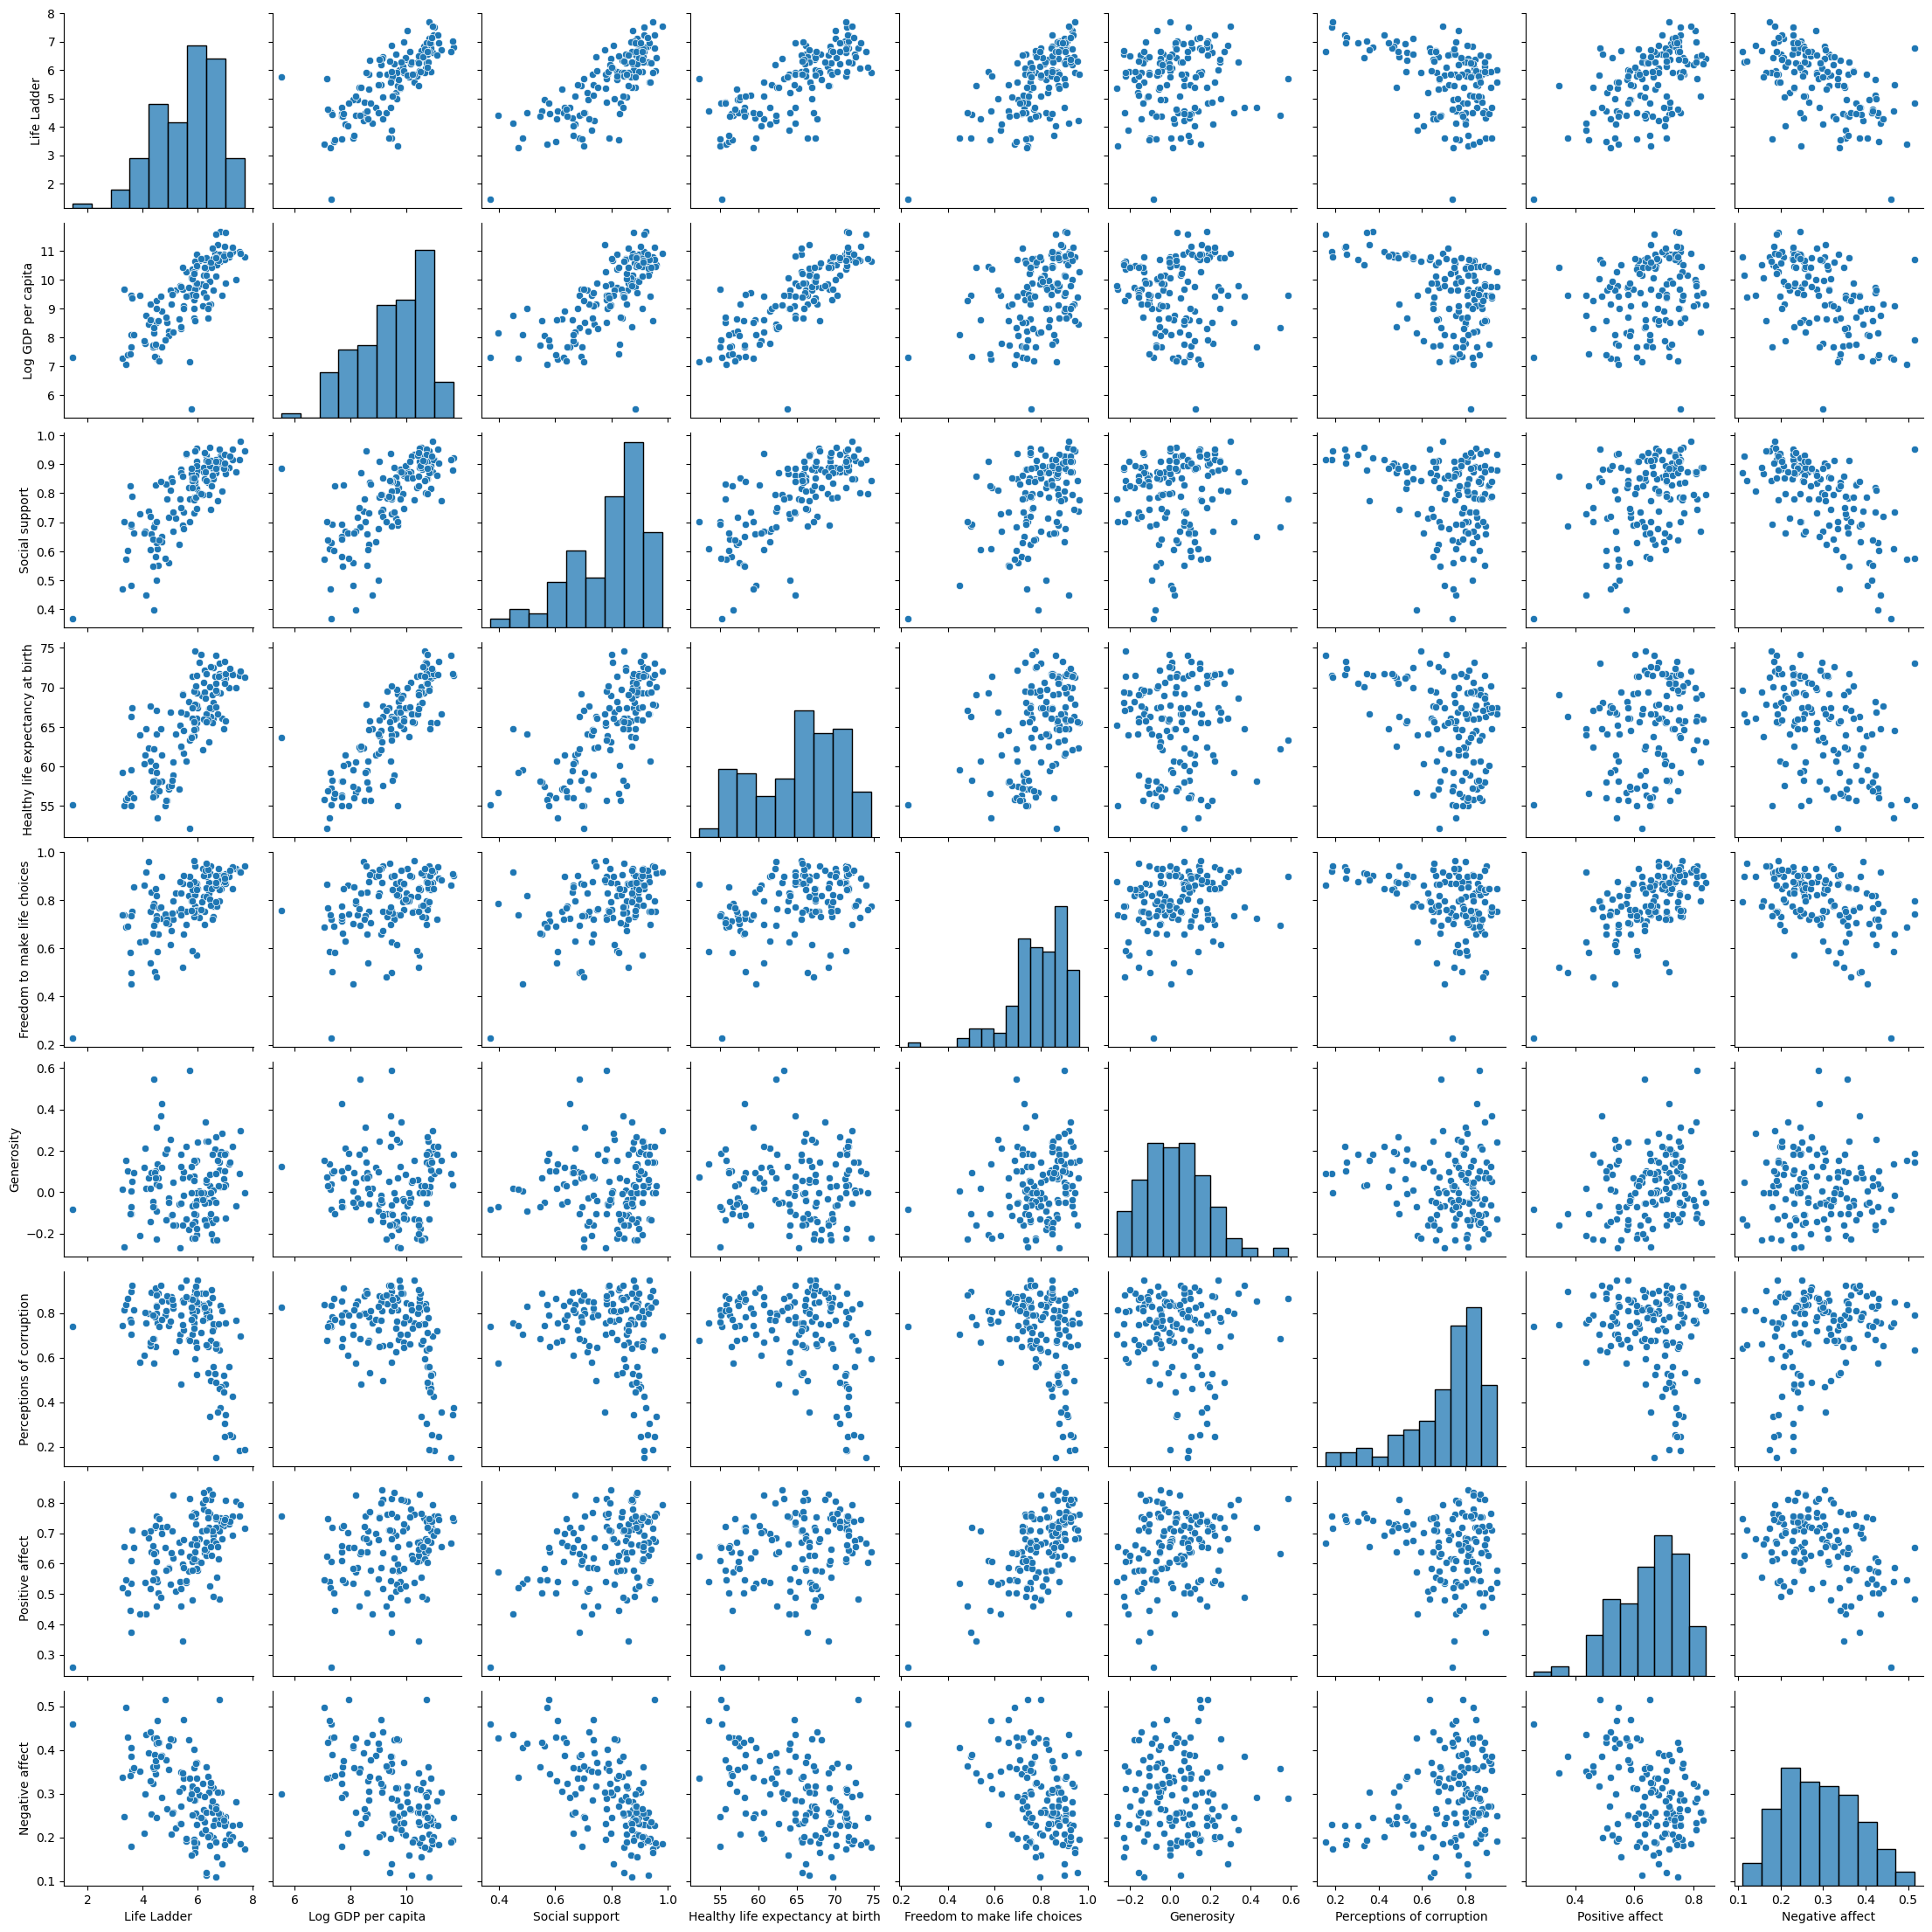

In [542]:
sns.pairplot(df23)  #linear relation

In [543]:
numeric23 = df23.select_dtypes(include='number')
correlations = numeric23.corr()

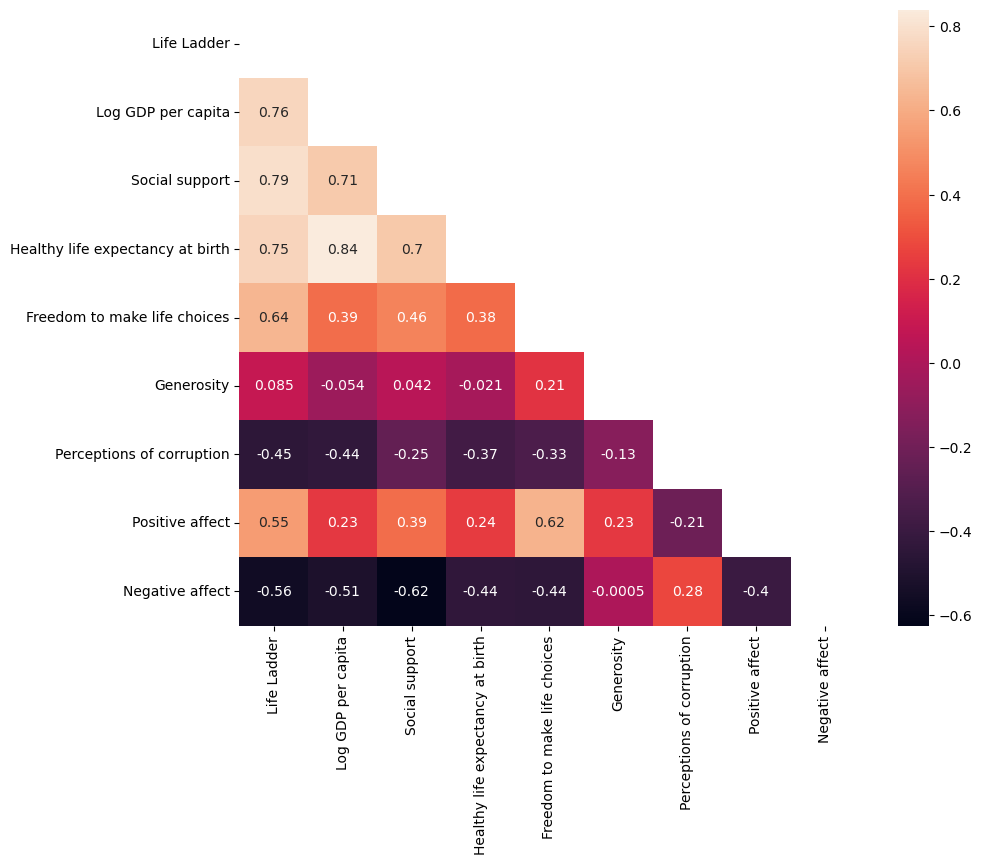

In [544]:
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True 

fig,ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

In [ ]:
# high correlation btw GDP and life expectancy ---> regularization methods Ridge or Lasso regression

## deal with outliers

In [545]:
for var in numeric23.columns:
     fig = go.Figure(data=go.Violin(y=numeric23[var], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0= var))

     fig.update_layout(yaxis_zeroline=False)
     fig.show()

In [546]:
Q1= numeric23.quantile(0.25)
Q3= numeric23.quantile(0.75)
IQR = Q3 - Q1

df_no_outlier = numeric23[(numeric23 > Q1 - 1.5 * IQR) & (numeric23 < Q3 + 1.5 * IQR) ]
df_low_outlier = numeric23[numeric23 < Q1 - 1.5 * IQR]
df_high_outlier = numeric23[numeric23 > Q3 + 1.5 * IQR]

In [547]:
df_no_outlier.isna().sum()

Life Ladder                          1
Log GDP per capita                   1
Social support                       2
Healthy life expectancy at birth     0
Freedom to make life choices         5
Generosity                           2
Perceptions of corruption           10
Positive affect                      2
Negative affect                      0
dtype: int64

In [548]:
df_low_outlier.info() # revisit these 10 countries with low perceptions of corruption

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       1 non-null      float64
 1   Log GDP per capita                1 non-null      float64
 2   Social support                    2 non-null      float64
 3   Healthy life expectancy at birth  0 non-null      float64
 4   Freedom to make life choices      5 non-null      float64
 5   Generosity                        0 non-null      float64
 6   Perceptions of corruption         10 non-null     float64
 7   Positive affect                   2 non-null      float64
 8   Negative affect                   0 non-null      float64
dtypes: float64(9)
memory usage: 10.8 KB


In [549]:
df_high_outlier.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 14 to 2362
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Life Ladder                       0 non-null      float64
 1   Log GDP per capita                0 non-null      float64
 2   Social support                    0 non-null      float64
 3   Healthy life expectancy at birth  0 non-null      float64
 4   Freedom to make life choices      0 non-null      float64
 5   Generosity                        2 non-null      float64
 6   Perceptions of corruption         0 non-null      float64
 7   Positive affect                   0 non-null      float64
 8   Negative affect                   0 non-null      float64
dtypes: float64(9)
memory usage: 10.8 KB


In [550]:
df_no_outlier = df_no_outlier.fillna(df_no_outlier.median())
df_no_outlier.isna().sum()

Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

## scale and regress

In [551]:
X = df_no_outlier.drop(columns = 'Life Ladder')
y = df_no_outlier['Life Ladder']

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [554]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [555]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [556]:
y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)

In [557]:
rmse = mean_squared_error(y_train,y_train_pre)
mae = mean_absolute_error(y_train,y_train_pre)
r2 = r2_score(y_train,y_train_pre)
print(rmse, mae, r2)

0.22869883239876432 0.3392964321533369 0.7815070304585663


In [558]:
rmse = mean_squared_error(y_test,y_test_pre)
mae = mean_absolute_error(y_test,y_test_pre)
r2 = r2_score(y_test,y_test_pre)
print(rmse, mae, r2)

0.3017370827445821 0.44429572643492116 0.7833046406745998


In [559]:
# try out RobustScaler with the outlier-included dataset 

In [560]:
def RegressionModel(data, scalertype, modeltype):
    X = data.drop(columns = 'Life Ladder')
    y = data['Life Ladder']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

    scaler = scalertype
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model = modeltype
    model.fit(X_train, y_train)

    y_train_pre = model.predict(X_train)
    y_test_pre = model.predict(X_test)

    rmse_train = mean_squared_error(y_train,y_train_pre)
    mae_train = mean_absolute_error(y_train,y_train_pre)
    r2_train = r2_score(y_train,y_train_pre)

    rmse_test = mean_squared_error(y_test,y_test_pre)
    mae_test = mean_absolute_error(y_test,y_test_pre)
    r2_test = r2_score(y_test,y_test_pre)
    
    print("rmse_train equals ", rmse_train, "mae_train equals ", mae_train, "r2_train equals ", r2_train, "rmse_test equals ", rmse_test, "mae_test equals ", mae_test, "r2_test equals ", r2_test)

    

In [561]:
RegressionModel(numeric23, RobustScaler(), LinearRegression())

rmse_train equals  0.2289069656683615 mae_train equals  0.3442879362633365 r2_train equals  0.8130740535464169 rmse_test equals  0.2291403414354851 mae_test equals  0.38255542777033574 r2_test equals  0.8354406817628752


In [562]:
RegressionModel(df_no_outlier, PolynomialFeatures(), LinearRegression())
# significant overfitting with two datasets (including outliers or not) ---> discard

rmse_train equals  0.133156456504373 mae_train equals  0.29183655340694686 r2_train equals  0.8727857536914455 rmse_test equals  0.5524758445538315 mae_test equals  0.5995348794119698 r2_test equals  0.6032342111707312


In [ ]:
# try out lasso to impair the impact from high correlation btw GDP and life expectancy

In [563]:
RegressionModel(df_no_outlier, StandardScaler(), Lasso(alpha =0.1))

rmse_train equals  0.26017403779049897 mae_train equals  0.3760871066206844 r2_train equals  0.7514364305309917 rmse_test equals  0.3302274085657008 mae_test equals  0.46691492329561035 r2_test equals  0.7628440418812753


In [564]:
RegressionModel(numeric23, RobustScaler(), Lasso(alpha =0.1)) # better than standard scaler

rmse_train equals  0.27282021745338914 mae_train equals  0.3867830458179713 r2_train equals  0.7772143927108299 rmse_test equals  0.27469930574189766 mae_test equals  0.42157140301666596 r2_test equals  0.8027220777017758


In [565]:
X = numeric23.drop(columns = 'Life Ladder')
y = numeric23['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

lasso = Lasso()
scaler = RobustScaler()
params = {"alpha": np.arange(0,1000,100)}
grid = GridSearchCV(lasso, param_grid= params, cv =10, verbose=1)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("coefficients model", best_model.coef_)
print("score on train set", best_model.score(X_train, y_train))
print("score on test set", best_model.score(X_test, y_test))

print("columns that were removed by Lasso", X.columns[best_model.coef_==0])
print("columns that were NOT removed by Lasso", X.columns[best_model.coef_ !=0])
print("best alpha", grid.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
coefficients model [ 0.38258927  0.51020784  0.27716161  0.26671271 -0.00747133 -0.16367535
  0.27591541  0.12502038]
score on train set 0.8130740535464168
score on test set 0.8354406817628754
columns that were removed by Lasso Index([], dtype='object')
columns that were NOT removed by Lasso Index(['Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')
best alpha {'alpha': 0}


/Users/giselles/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: UserWarning:

With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator

/Users/giselles/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: UserWarning:

Coordinate descent with no regularization may lead to unexpected results and is discouraged.

/Users/giselles/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.915e+00, tolerance: 1.032e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.

/Users/giselles/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1474: User

In [ ]:
# given the result from Lasso Alpha selection the correlation btw GDP and life expectancy is acceptable --> keep them both

In [566]:
X = numeric23.drop(columns = 'Life Ladder')
y = numeric23['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
    
model = LinearRegression()
model.fit(X_train, y_train)

feature_importance = pd.DataFrame({"features": X.columns, "weights": model.coef_})
feature_importance.sort_values(by = "weights", ascending =False)

,features,weights
1,Social support,0.510208
0,Log GDP per capita,0.382589
2,Healthy life expectancy at birth,0.277162
6,Positive affect,0.275915
3,Freedom to make life choices,0.266713
7,Negative affect,0.125020
4,Generosity,-0.007471
5,Perceptions of corruption,-0.163675


In [ ]:
# most important features: social support, GDP per capita, and life expectancy

In [ ]:
# analyse outliers -- 10 countries with the lowest "Perceptions of corruption"

In [568]:
df_outlier = df23.loc[df23['Perceptions of corruption'].nsmallest(10).index]
df_outlier  # 5 outliers are among the top 10 happy countries in 2023 --> should include them in regression

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
1851,2023-01-01,Singapore,6.653942,11.590220,0.916326,74.000000,0.861233,0.088438,0.152543,0.667157,0.190486
556,2023-01-01,Denmark,7.504193,10.996293,0.915670,71.500000,0.922739,0.089434,0.183567,0.757006,0.229489
680,2023-01-01,Finland,7.698929,10.808451,0.946865,71.300003,0.943418,-0.001130,0.185229,0.716778,0.172830
1594,2023-01-01,Norway,7.248675,11.124797,0.951586,71.599998,0.937649,0.219493,0.244850,0.756484,0.228338
2017,2023-01-01,Switzerland,6.968833,11.169257,0.903757,73.300003,0.890972,0.103554,0.246744,0.745368,0.184582
2004,2023-01-01,Sweden,7.160777,10.902137,0.926618,72.400002,0.926379,0.146668,0.253074,0.738826,0.194445
1515,2023-01-01,New Zealand,6.975955,10.719568,0.932887,70.500000,0.876608,0.181392,0.303656,0.738133,0.228583
649,2023-01-01,Estonia,6.429873,10.516722,0.958171,70.099998,0.914573,0.031501,0.333731,0.764900,0.182296
1249,2023-01-01,Luxembourg,7.016062,11.648711,0.879195,71.699997,0.910813,0.033440,0.343211,0.750700,0.194495
2206,2023-01-01,United Arab Emirates,6.728384,11.235544,0.775808,66.599998,0.885922,0.155217,0.355116,0.654696,0.304355


In [569]:
X = df_outlier.drop(columns = ['Life Ladder', 'year', 'Country name'])
y = df_outlier['Life Ladder']

scaler = RobustScaler()
X_scaler = scaler.fit_transform(X)
    
model = LinearRegression()
model.fit(X_scaler, y)
y_pre = model.predict(X_scaler)

rmse = mean_squared_error(y,y_pre)
mae = mean_absolute_error(y,y_pre)
r2 = r2_score(y,y_pre)

print("rmse equals ", rmse, "mae equals ", mae, "r2 equals ", r2)

feature_importance = pd.DataFrame({"features": X.columns, "weights": model.coef_})
feature_importance.sort_values(by = "weights", ascending =False)

rmse equals  0.03162143823649206 mae equals  0.15278287726399106 r2 equals  0.7632974051725046


,features,weights
4,Generosity,0.737468
6,Positive affect,0.445465
0,Log GDP per capita,0.325788
3,Freedom to make life choices,0.004142
1,Social support,-0.342431
2,Healthy life expectancy at birth,-0.889297
7,Negative affect,-1.175192
5,Perceptions of corruption,-1.506745


In [ ]:
# lower rmse and mae than model, and slightly lower r2 than model 
# most of the counties with low Perceptions of corruption are among the happiest countries --> Perceptions of corruption may contribute a lot, need more data

## try to predict happy or not via logistic regression

In [585]:
df23_log = df23.drop(columns = ['year', 'Country name'])
df23_log

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
14,1.445909,7.324501,0.368478,55.200001,0.228301,-0.084656,0.738471,0.260513,0.460167
30,5.444691,9.688706,0.690753,69.199997,0.871545,0.067885,0.855425,0.597349,0.314227
63,6.393229,9.993596,0.892118,67.300003,0.831684,-0.129061,0.846094,0.720122,0.301162
80,5.679090,9.729613,0.819338,68.199997,0.819376,-0.179444,0.680709,0.574717,0.422631
97,7.024582,10.846434,0.896460,71.199997,0.875769,0.187309,0.481580,0.731053,0.248163
...,...,...,...,...,...,...,...,...,...
2295,5.765363,5.526723,0.884668,63.700001,0.756530,0.123792,0.825393,0.757685,0.300038
2313,6.325115,9.392351,0.844905,65.699997,0.955560,-0.159114,0.655275,0.710068,0.119510
2327,3.531574,7.447973,0.824958,56.599998,0.582724,-0.106460,0.771464,0.446534,0.340794
2344,3.685568,8.115053,0.664099,56.099998,0.854004,0.092377,0.814191,0.652999,0.359132


In [586]:
df23_log['Life Ladder'] = df23_log['Life Ladder'].apply(lambda x: 1 if x > 5 else 0) # transform life ladder into binary, 1 happy, 0 not happy

In [587]:
df23_log['Life Ladder'].value_counts() #imbalance

Life Ladder
1    97
0    41
Name: count, dtype: int64

/Users/giselles/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight

/Users/giselles/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/Users/giselles/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/Users/giselles/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/Users/giselles/anaconda3/lib/python3.11/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning:

Perfect separation or prediction detected, parameter may not be identified

/Users/giselles/anacon

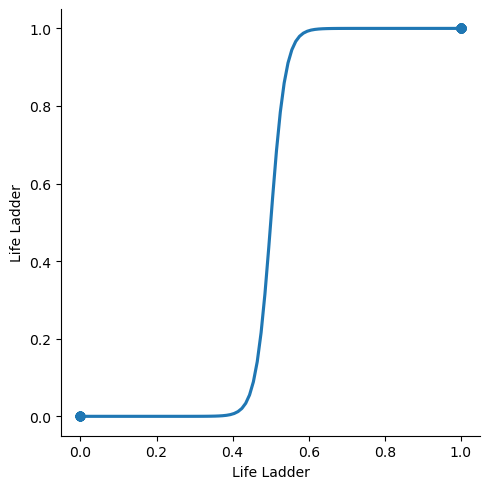

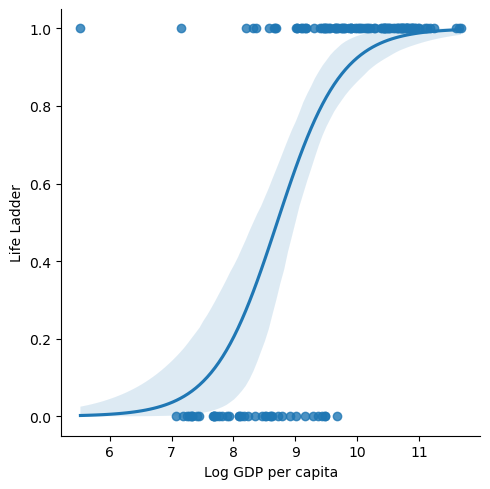

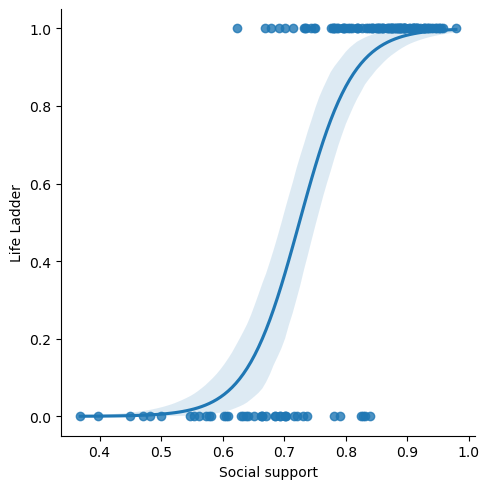

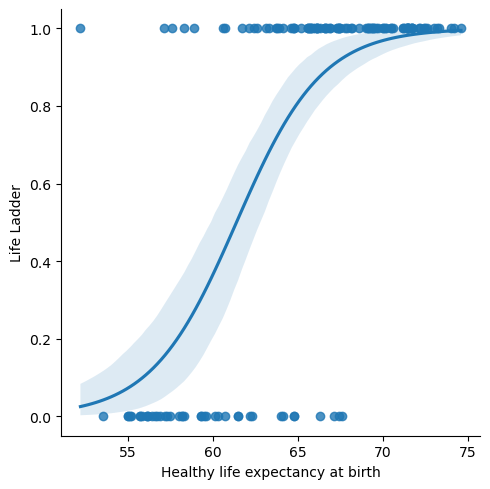

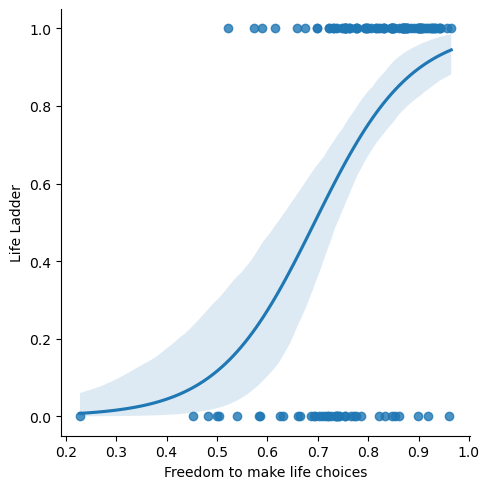

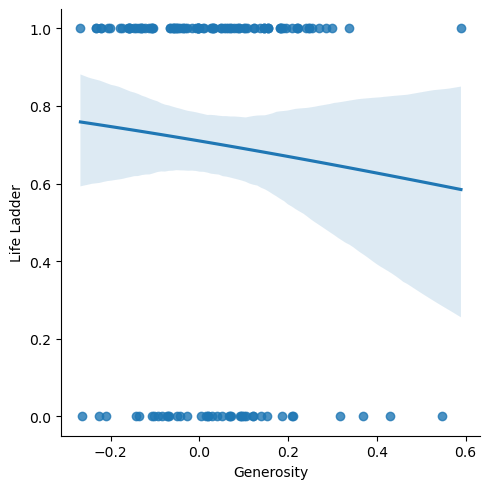

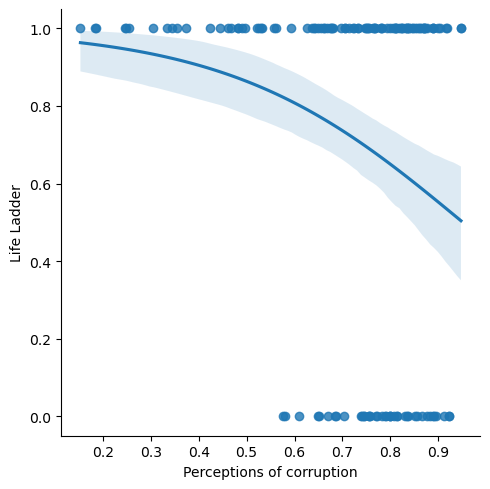

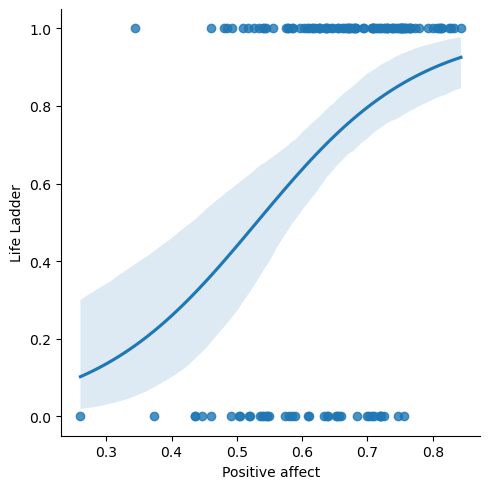

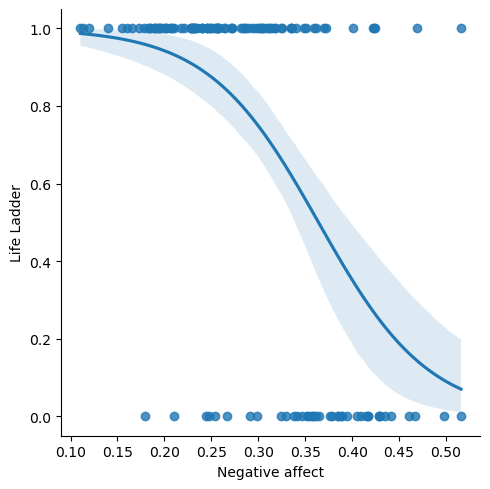

In [588]:
numerical_var = df23_log.select_dtypes(include='number')

for feature in numerical_var:
    sns.lmplot(x=feature, y="Life Ladder", data = df23_log, logistic=True)

In [589]:
X = df23_log.drop(columns = 'Life Ladder')
y = df23_log['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(k_neighbors=2)
X_train, y_train = sm.fit_resample(X_train, y_train)
    
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)

print(classification_report(y_test, y_test_pre))
print(classification_report(y_train, y_train_pre))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.95      0.95        19

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        78
           1       0.96      0.88      0.92        78

    accuracy                           0.92       156
   macro avg       0.93      0.92      0.92       156
weighted avg       0.93      0.92      0.92       156



In [ ]:
# look for the best n neighbor value to maximize f1

maximum f1score test set 0.9422483649376826 at K 16


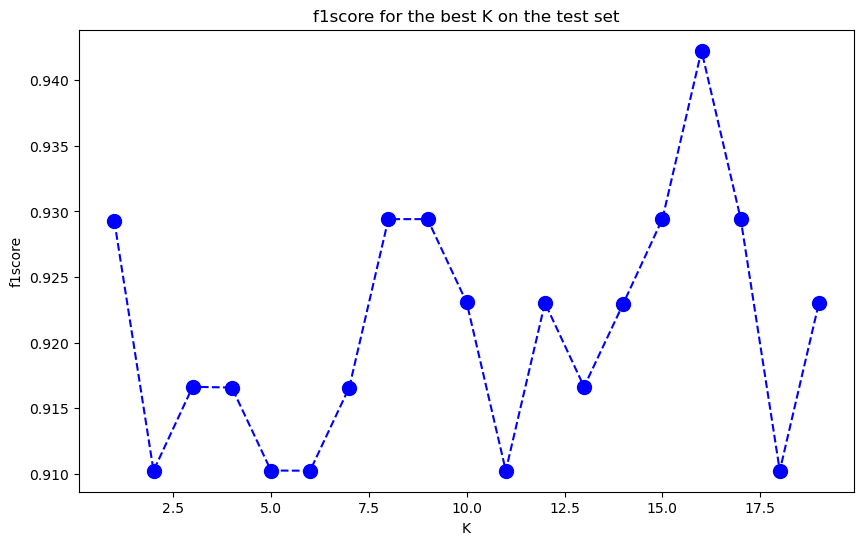

In [635]:
f1score = []

for neighbor in range(1,20):
    X = df23_log.drop(columns = 'Life Ladder')
    y = df23_log['Life Ladder']

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
    
    scaler = RobustScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    sm = SMOTE(k_neighbors=neighbor)
    X_train, y_train = sm.fit_resample(X_train, y_train)  
    
    model = LogisticRegression()
    model.fit(X_train, y_train)

    y_train_pre = model.predict(X_train)
    y_test_pre = model.predict(X_test)
    
    f1score.append(f1_score(y_train, y_train_pre, average = "weighted"))

plt.figure(figsize=(10,6))
plt.plot(range(1,20), f1score, color = "blue", linestyle = "dashed",
         marker = "o", markerfacecolor = "blue", markersize = 10)

plt.title("f1score for the best K on the test set")

plt.xlabel("K")
plt.ylabel("f1score")

print("maximum f1score test set", max(f1score), "at K", f1score.index(max(f1score))+1)

In [ ]:
# to test how well the model predicts now

In [636]:
X = df23_log.drop(columns = 'Life Ladder')
y = df23_log['Life Ladder']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

sm = SMOTE(k_neighbors=16)
X_train, y_train = sm.fit_resample(X_train, y_train)
    
model = LogisticRegression()
model.fit(X_train, y_train)

y_train_pre = model.predict(X_train)
y_test_pre = model.predict(X_test)

print(classification_report(y_test, y_test_pre))
print(classification_report(y_train, y_train_pre))

feature_importance = pd.DataFrame({"features": X.columns, "weights": model.coef_.flatten()})
feature_importance.sort_values(by = "weights", ascending =False)

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.95      0.95      0.95        19

    accuracy                           0.94        35
   macro avg       0.94      0.94      0.94        35
weighted avg       0.94      0.94      0.94        35

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        78
           1       0.95      0.90      0.92        78

    accuracy                           0.92       156
   macro avg       0.92      0.92      0.92       156
weighted avg       0.92      0.92      0.92       156



,features,weights
1,Social support,1.635080
2,Healthy life expectancy at birth,1.408721
0,Log GDP per capita,0.949141
3,Freedom to make life choices,0.863854
6,Positive affect,0.408012
4,Generosity,-0.115899
7,Negative affect,-0.825096
5,Perceptions of corruption,-1.198265


In [ ]:
# f1-scores almost the same
# most important features: social support, life expectancy, and GDP per capita, the same as linear regression 

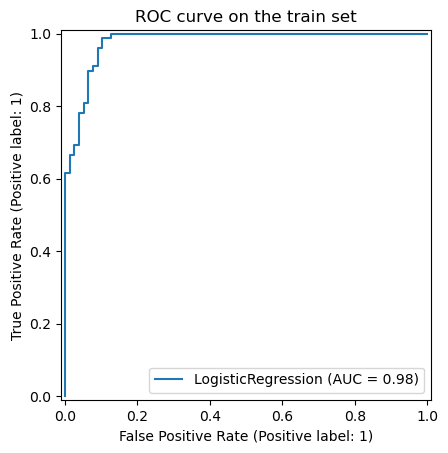

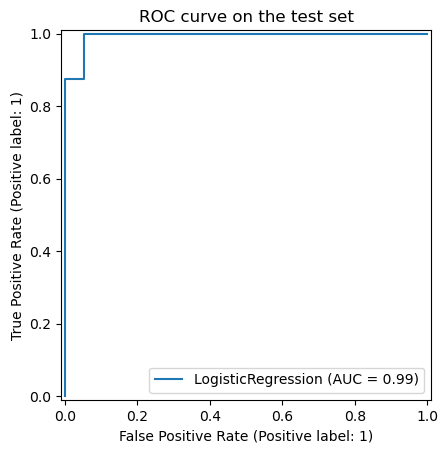

In [577]:
_, ax = plt.subplots()
ax.set(title = "ROC curve on the train set")
RocCurveDisplay.from_estimator(model, X_train, y_train, ax=ax)
plt.show()

_, ax = plt.subplots()
ax.set(title = "ROC curve on the test set")
RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax)
plt.show()

In [641]:
# confidence interval to see globally the proportion of happy countries

def CI(confidence_level):
    n = len(df23_log)
    p = df23_log["Life Ladder"].sum()/n
    t = stats.t.ppf(confidence_level + (1- confidence_level)/2, n-1)
    error = t * m.sqrt(p * (1-p)/n) 
    CI = [p - error, p + error]
    return CI

In [645]:
CI(0.95)

[0.6259747824755832, 0.7798223189736921]

In [644]:
CI(0.9)

[0.6384767060322742, 0.7673203954170011]

In [646]:
CI(0.85)

[0.6465837978591772, 0.7592133035900982]

In [ ]:
# conclusion: safe to say over 62% countries with overall happy citizens 

## test whether the result of regressions corresponds with the observations from the latest three yrs

In [ ]:
# most important features: social support, GDP per capita, and life expectancy

2023:
#bottom: Afghanistan
#top: Finland
#upward: Kuwait
#downward: Yemen, Comoros, Sri Lanka

In [658]:
df_timeseries = df[df['Country name'].isin(['Afghanistan', 'Finland', 'Kuwait', 'Yemen', 'Comoros'])]
df_timeseries

,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008-01-01,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009-01-01,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010-01-01,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011-01-01,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012-01-01,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2323,2017-01-01,Yemen,3.253560,7.243477,0.789555,57.950001,0.595191,-0.127762,0.804746,0.368106,0.295064
2324,2018-01-01,Yemen,3.057514,7.443574,0.789422,57.724998,0.552726,-0.127163,0.792587,0.409410,0.314870
2325,2019-01-01,Yemen,4.196913,7.447973,0.870043,57.500000,0.651308,-0.106460,0.798228,0.481123,0.213043
2326,2022-01-01,Yemen,3.590379,7.447973,0.872113,56.825001,0.606788,-0.106460,0.787555,0.459952,0.255151


In [659]:
df_timeseries['year'] = pd.to_datetime(df_timeseries['year']).dt.year
df_timeseries

/var/folders/6g/z7c4_v2s4x5g_4nmtry98b2c0000gn/T/ipykernel_75965/971342778.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,Country name,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008,Afghanistan,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,2009,Afghanistan,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,2010,Afghanistan,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,2011,Afghanistan,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,2012,Afghanistan,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2323,2017,Yemen,3.253560,7.243477,0.789555,57.950001,0.595191,-0.127762,0.804746,0.368106,0.295064
2324,2018,Yemen,3.057514,7.443574,0.789422,57.724998,0.552726,-0.127163,0.792587,0.409410,0.314870
2325,2019,Yemen,4.196913,7.447973,0.870043,57.500000,0.651308,-0.106460,0.798228,0.481123,0.213043
2326,2022,Yemen,3.590379,7.447973,0.872113,56.825001,0.606788,-0.106460,0.787555,0.459952,0.255151


In [676]:
for country in ['Afghanistan', 'Finland', 'Kuwait', 'Yemen', 'Comoros', 'Sri Lanka']:
    fig = px.line(df[df['Country name']==country], x='year', y='Social support')
    fig.update_layout(xaxis_range=['2021','2023'], title_text='Social support - '+ country)
    fig.show()